CHANDRAGIRI NIKHITHA

TASK 3: NUMBER PREDICTION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix,classification_report,f1_score

In [5]:
# Load the data
df = pd.read_csv('stockprice.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
#Analyze and visualize the dataset
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.describe(include='all')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
unique,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,28-09-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,NaN,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,NaN,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,NaN,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,NaN,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,NaN,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
df.shape

(2035, 8)

In [10]:
#checking for null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
#checking for duplicates
duplicates= df.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

C:\Users\cnikh\AppData\Local\Temp\ipykernel_8820\1324887902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

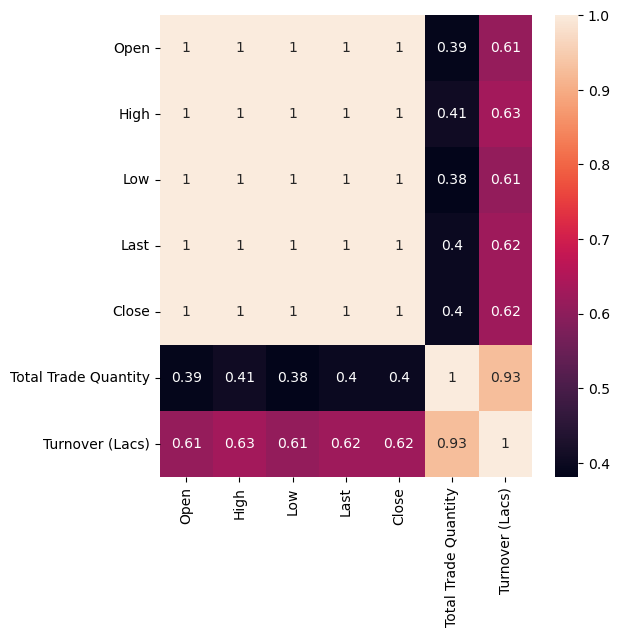

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Date'>

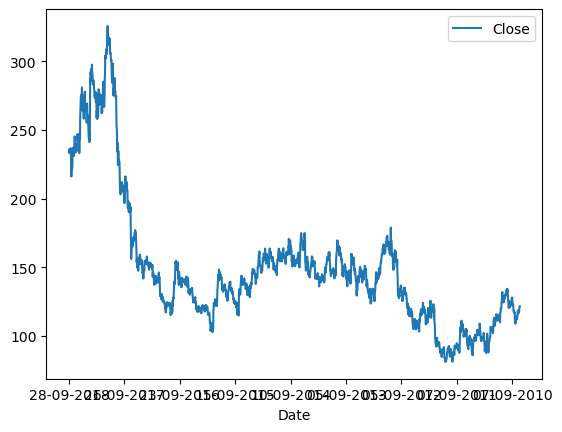

In [14]:
df.plot(x="Date", y="Close")

In [15]:
df_new=df.reset_index()['Close']

In [16]:
df_new

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
df_new = scaler.fit_transform(np.array(df_new).reshape(-1,1))
df_new

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [18]:
#Splitting the data into train and test split
train_data,test_data= train_test_split(df_new,test_size=0.3)

In [19]:
train_data.shape

(1424, 1)

In [20]:
#splitting the data into target and features 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
size=100
x_train,y_train=create_dataset(train_data,size)
x_test,y_test=create_dataset(train_data,size)

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1323, 100), (1323,), (1323, 100), (1323,))

In [23]:
#reshaping input 
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1323, 100, 1), (1323,), (1323, 100, 1), (1323,))

In [25]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
21/21 [==============================] - 22s 535ms/step - loss: 0.0520 - val_loss: 0.0409
Epoch 2/100
21/21 [==============================] - 9s 438ms/step - loss: 0.0413 - val_loss: 0.0411
Epoch 3/100
21/21 [==============================] - 9s 448ms/step - loss: 0.0410 - val_loss: 0.0409
Epoch 4/100
21/21 [==============================] - 9s 417ms/step - loss: 0.0410 - val_loss: 0.0410
Epoch 5/100
21/21 [==============================] - 10s 466ms/step - loss: 0.0409 - val_loss: 0.0408
Epoch 6/100
21/21 [==============================] - 9s 416ms/step - loss: 0.0410 - val_loss: 0.0415
Epoch 7/100
21/21 [==============================] - 10s 461ms/step - loss: 0.0409 - val_loss: 0.0405
Epoch 8/100
21/21 [==============================] - 9s 444ms/step - loss: 0.0407 - val_loss: 0.0405
Epoch 9/100
21/21 [==============================] - 9s 434ms/step - loss: 0.0406 - val_loss: 0.0405
Epoch 10/100
21/21 [==============================] - 9s 445ms/step - loss: 0.0409 - val

In [28]:
#predicting
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

42/42 [==============================] - 3s 75ms/step


In [29]:
train_predict

array([[0.2947113 ],
       [0.29528168],
       [0.2960587 ],
       ...,
       [0.28323567],
       [0.28709537],
       [0.29235637]], dtype=float32)

In [30]:
test_predict

array([[0.2947113 ],
       [0.29528168],
       [0.2960587 ],
       ...,
       [0.28323567],
       [0.28709537],
       [0.29235637]], dtype=float32)

In [31]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.20058442322248046

In [32]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.20058442322248046